In [1]:
# generic data science libraries
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np

# data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# import scikit-learn
from sklearn.model_selection import train_test_split

# models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

# metrics
from sklearn.metrics import accuracy_score, classification_report, auc, confusion_matrix, roc_curve

In [2]:
df = pd.read_csv("version10.csv")
df

,Unnamed: 0,diagnosis,radius_worst_bins,concave_points_mean_bins,perimeter_worst_bins,concave points_worst_bins,radius_mean_bins,perimeter_mean_bins,area_worst_bins,area_mean_bins
0,0,M,High,High,High,High,High,High,High,High
1,1,M,High,Medium_High,High,High,High,High,High,High
2,2,M,High,High,High,High,High,High,High,High
3,3,M,Medium_Low,High,Medium_High,High,Low,Medium_Low,Medium_Low,Low
4,4,M,High,High,High,High,High,High,High,High
...,...,...,...,...,...,...,...,...,...,...
564,564,M,High,High,High,High,High,High,High,High
565,565,M,High,High,High,High,High,High,High,High
566,566,M,Medium_High,Medium_High,High,Medium_High,High,High,High,High
567,567,M,High,High,High,High,High,High,High,High


In [3]:
df2 = df.drop(columns=['Unnamed: 0'])
df2

,diagnosis,radius_worst_bins,concave_points_mean_bins,perimeter_worst_bins,concave points_worst_bins,radius_mean_bins,perimeter_mean_bins,area_worst_bins,area_mean_bins
0,M,High,High,High,High,High,High,High,High
1,M,High,Medium_High,High,High,High,High,High,High
2,M,High,High,High,High,High,High,High,High
3,M,Medium_Low,High,Medium_High,High,Low,Medium_Low,Medium_Low,Low
4,M,High,High,High,High,High,High,High,High
...,...,...,...,...,...,...,...,...,...
564,M,High,High,High,High,High,High,High,High
565,M,High,High,High,High,High,High,High,High
566,M,Medium_High,Medium_High,High,Medium_High,High,High,High,High
567,M,High,High,High,High,High,High,High,High


In [4]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   diagnosis                  569 non-null    object
 1   radius_worst_bins          569 non-null    object
 2   concave_points_mean_bins   569 non-null    object
 3   perimeter_worst_bins       569 non-null    object
 4   concave points_worst_bins  569 non-null    object
 5   radius_mean_bins           569 non-null    object
 6   perimeter_mean_bins        569 non-null    object
 7   area_worst_bins            569 non-null    object
 8   area_mean_bins             569 non-null    object
dtypes: object(9)
memory usage: 40.1+ KB


In [5]:
 df2.groupby("diagnosis").size()

diagnosis
B    357
M    212
dtype: int64

In [6]:
 df2["diagnosis"] = [0 if x == "B" else 1 for x in df.diagnosis]

In [7]:
df2.columns

Index(['diagnosis', 'radius_worst_bins', 'concave_points_mean_bins',
       'perimeter_worst_bins', 'concave points_worst_bins', 'radius_mean_bins',
       'perimeter_mean_bins', 'area_worst_bins', 'area_mean_bins'],
      dtype='object')

In [8]:
df_sub= pd.DataFrame(df2.diagnosis)
df_sub

,diagnosis
0,1
1,1
2,1
3,1
4,1
...,...
564,1
565,1
566,1
567,1


In [9]:
# get dums
dums_linear = pd.get_dummies(df2.loc[:, ['radius_worst_bins', 'concave_points_mean_bins',
       'perimeter_worst_bins', 'concave points_worst_bins', 'radius_mean_bins',
       'perimeter_mean_bins', 'area_worst_bins', 'area_mean_bins']], drop_first=True)
dums_other = pd.get_dummies(df2.loc[:, ['radius_worst_bins', 'concave_points_mean_bins',
       'perimeter_worst_bins', 'concave points_worst_bins', 'radius_mean_bins',
       'perimeter_mean_bins', 'area_worst_bins', 'area_mean_bins']], drop_first=False)

#concat
df_sub_linear = pd.concat([df_sub, dums_linear], axis=1)
df_sub_other = pd.concat([df_sub, dums_other], axis=1)



In [10]:
df_sub_linear

,diagnosis,radius_worst_bins_Low,radius_worst_bins_Medium_High,radius_worst_bins_Medium_Low,concave_points_mean_bins_Low,concave_points_mean_bins_Medium_High,concave_points_mean_bins_Medium_Low,perimeter_worst_bins_Low,perimeter_worst_bins_Medium_High,perimeter_worst_bins_Medium_Low,concave points_worst_bins_Low,concave points_worst_bins_Medium_High,concave points_worst_bins_Medium_Low,radius_mean_bins_Low,radius_mean_bins_Medium_High,radius_mean_bins_Medium_Low,perimeter_mean_bins_Low,perimeter_mean_bins_Medium_High,perimeter_mean_bins_Medium_Low,area_worst_bins_Low,area_worst_bins_Medium_High,area_worst_bins_Medium_Low,area_mean_bins_Low,area_mean_bins_Medium_High,area_mean_bins_Medium_Low
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
565,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
566,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
567,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [11]:
df_sub_other.corr()

,diagnosis,radius_worst_bins_High,radius_worst_bins_Low,radius_worst_bins_Medium_High,radius_worst_bins_Medium_Low,concave_points_mean_bins_High,concave_points_mean_bins_Low,concave_points_mean_bins_Medium_High,concave_points_mean_bins_Medium_Low,perimeter_worst_bins_High,perimeter_worst_bins_Low,perimeter_worst_bins_Medium_High,perimeter_worst_bins_Medium_Low,concave points_worst_bins_High,concave points_worst_bins_Low,concave points_worst_bins_Medium_High,concave points_worst_bins_Medium_Low,radius_mean_bins_High,radius_mean_bins_Low,radius_mean_bins_Medium_High,radius_mean_bins_Medium_Low,perimeter_mean_bins_High,perimeter_mean_bins_Low,perimeter_mean_bins_Medium_High,perimeter_mean_bins_Medium_Low,area_worst_bins_High,area_worst_bins_Low,area_worst_bins_Medium_High,area_worst_bins_Medium_Low,area_mean_bins_High,area_mean_bins_Low,area_mean_bins_Medium_High,area_mean_bins_Medium_Low
diagnosis,1.000000,0.732873,-0.433885,0.116789,-0.407187,0.714738,-0.438095,0.084777,-0.360395,0.739936,-0.446475,0.093177,-0.385593,0.731537,-0.438095,0.084777,-0.377194,0.697939,-0.421335,0.051179,-0.326797,0.697939,-0.421335,0.059579,-0.335197,0.739936,-0.429715,0.101576,-0.410792,0.697939,-0.423478,0.051179,-0.324434
radius_worst_bins_High,0.732873,1.000000,-0.327886,-0.326340,-0.338708,0.698319,-0.330978,-0.065422,-0.301145,0.962329,-0.330978,-0.301145,-0.329432,0.622888,-0.330978,-0.008849,-0.282287,0.886898,-0.330978,-0.225714,-0.329432,0.886898,-0.330978,-0.225714,-0.329432,0.981187,-0.330978,-0.320003,-0.329432,0.896326,-0.332523,-0.235143,-0.327886
radius_worst_bins_Low,-0.433885,-0.327886,1.000000,-0.327886,-0.340312,-0.312180,0.399440,-0.171084,0.082889,-0.330992,0.915584,-0.330992,-0.255741,-0.321586,0.408825,-0.180490,0.092295,-0.330992,0.878046,-0.330992,-0.218116,-0.330992,0.868662,-0.330992,-0.208709,-0.330992,0.962506,-0.330992,-0.302773,-0.330992,0.873701,-0.330992,-0.216295
radius_worst_bins_Medium_High,0.116789,-0.326340,-0.327886,1.000000,-0.338708,-0.055993,-0.208688,0.292876,-0.027707,-0.282287,-0.330978,0.877469,-0.263429,0.019438,-0.208688,0.274018,-0.084280,-0.206856,-0.330978,0.717177,-0.178569,-0.206856,-0.330978,0.736035,-0.197427,-0.301145,-0.330978,0.943471,-0.310574,-0.216285,-0.332523,0.726606,-0.176667
radius_worst_bins_Medium_Low,-0.407187,-0.338708,-0.340312,-0.338708,1.000000,-0.323402,0.136733,-0.054942,0.241291,-0.341916,-0.251164,-0.240087,0.833755,-0.314145,0.127497,-0.082713,0.269062,-0.341916,-0.214222,-0.156771,0.713411,-0.341916,-0.204986,-0.175286,0.722668,-0.341916,-0.297343,-0.286373,0.926328,-0.341916,-0.206910,-0.156771,0.708234
concave_points_mean_bins_High,0.714738,0.698319,-0.312180,-0.055993,-0.323402,1.000000,-0.334113,-0.332553,-0.332553,0.718475,-0.315389,-0.088564,-0.313784,0.774780,-0.334113,-0.116717,-0.323169,0.662170,-0.315389,-0.069796,-0.276248,0.690322,-0.324751,-0.079180,-0.285632,0.709091,-0.315389,-0.079180,-0.313784,0.671554,-0.316992,-0.079180,-0.274554
concave_points_mean_bins_Low,-0.438095,-0.330978,0.399440,-0.208688,0.136733,-0.334113,1.000000,-0.334113,-0.334113,-0.334113,0.467596,-0.212404,0.077827,-0.334113,0.682426,-0.315389,-0.034520,-0.334113,0.392872,-0.146868,0.087189,-0.334113,0.402213,-0.193679,0.124638,-0.334113,0.383532,-0.203041,0.152725,-0.334113,0.380305,-0.146868,0.099139
concave_points_mean_bins_Medium_High,0.084777,-0.065422,-0.171084,0.292876,-0.054942,-0.332553,-0.334113,1.000000,-0.332553,-0.069796,-0.221766,0.343108,-0.051027,-0.107333,-0.334113,0.558944,-0.116717,-0.032259,-0.156230,0.230498,-0.041643,-0.051027,-0.174954,0.268034,-0.041643,-0.060412,-0.165592,0.277419,-0.051027,-0.041643,-0.148860,0.230498,-0.039394
concave_points_mean_bins_Medium_Low,-0.360395,-0.301145,0.082889,-0.027707,0.241291,-0.332553,-0.334113,-0.332553,1.000000,-0.313784,0.068465,-0.041643,0.286803,-0.332553,-0.015796,-0.126101,0.474486,-0.295016,0.077827,-0.013491,0.230498,-0.304400,0.096552,0.005278,0.202345,-0.313784,0.096552,0.005278,0.211729,-0.295016,0.084657,-0.00410

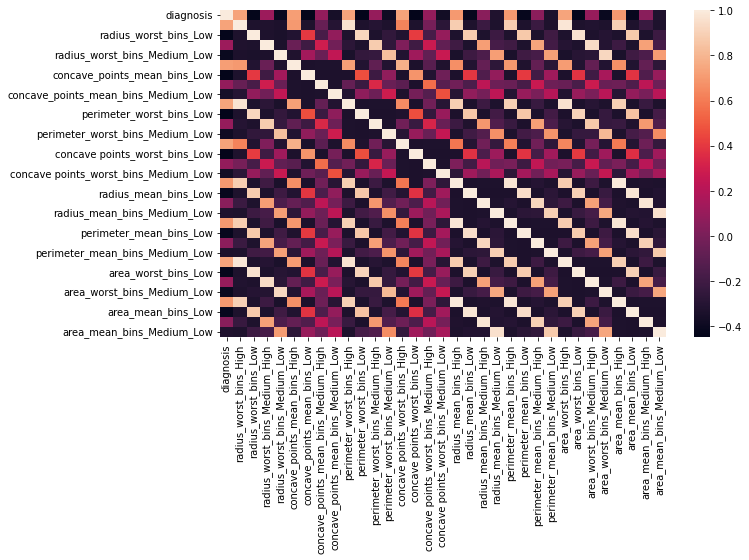

In [12]:
plt.figure(figsize=(10,6))
sns.heatmap(df_sub_other.corr())
plt.show()

In [13]:
# get pandas columns for prediction
target = df_sub_linear["diagnosis"]
features = df_sub_linear.drop(["diagnosis"], axis=1)

# convert to lists/arrays (MUST HAPPEN)
X = np.array(features)
y = np.array(target)

# train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

Logistic Classifier:
Classification Report - In Sample
              precision    recall  f1-score   support

           0       0.93      0.99      0.96       285
           1       0.97      0.88      0.92       170

    accuracy                           0.95       455
   macro avg       0.95      0.93      0.94       455
weighted avg       0.95      0.95      0.94       455


Confusion Matrix - In Sample
[[281   4]
 [ 21 149]]


Classification Report - Out Sample
              precision    recall  f1-score   support

           0       0.91      0.97      0.94        72
           1       0.95      0.83      0.89        42

    accuracy                           0.92       114
   macro avg       0.93      0.90      0.91       114
weighted avg       0.92      0.92      0.92       114


Confusion Matrix - Out Sample
[[70  2]
 [ 7 35]]


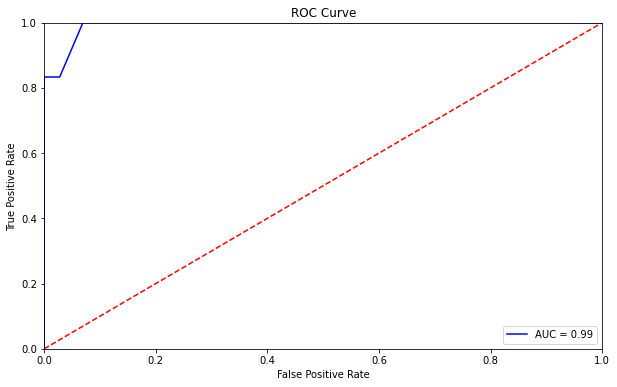

In [14]:
 # train the model
reg = LogisticRegression()
reg.fit(X_train, y_train)

#get predictions
in_sample_preds = reg.predict(X_train)
out_sample_preds = reg.predict(X_test)

# get evaluation report
print("Logistic Classifier:")
print("Classification Report - In Sample")
print(classification_report(y_train, in_sample_preds))
print()
print("Confusion Matrix - In Sample")
print(confusion_matrix(y_train, in_sample_preds))
print()
print()
print("Classification Report - Out Sample")
print(classification_report(y_test, out_sample_preds))
print()
print("Confusion Matrix - Out Sample")
print(confusion_matrix(y_test, out_sample_preds))

# get probabilities for the ROC curve
preds = reg.predict_proba(X_test)[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

# method I: plt
plt.figure(figsize=(10,6))
plt.title('ROC Curve')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [15]:
# get pandas columns for prediction
target = df_sub_other["diagnosis"]
features = df_sub_other.drop(["diagnosis"], axis=1)

# convert to lists/arrays (MUST HAPPEN)
X = np.array(features)
y = np.array(target)

# train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

Decision Tree Classifier:
Classification Report - In Sample
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       285
           1       0.99      0.91      0.95       170

    accuracy                           0.96       455
   macro avg       0.97      0.95      0.96       455
weighted avg       0.97      0.96      0.96       455


Confusion Matrix - In Sample
[[284   1]
 [ 15 155]]


Classification Report - Out Sample
              precision    recall  f1-score   support

           0       0.91      0.97      0.94        72
           1       0.95      0.83      0.89        42

    accuracy                           0.92       114
   macro avg       0.93      0.90      0.91       114
weighted avg       0.92      0.92      0.92       114


Confusion Matrix - Out Sample
[[70  2]
 [ 7 35]]


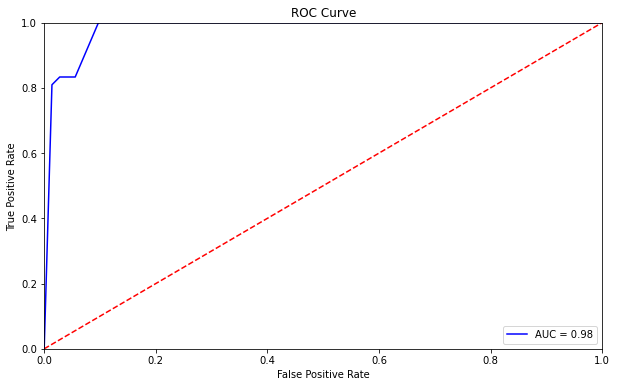

In [16]:
# train the model
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

#get predictions
in_sample_preds = dt.predict(X_train)
out_sample_preds = dt.predict(X_test)

# get evaluation report
print("Decision Tree Classifier:")
print("Classification Report - In Sample")
print(classification_report(y_train, in_sample_preds))
print()
print("Confusion Matrix - In Sample")
print(confusion_matrix(y_train, in_sample_preds))
print()
print()
print("Classification Report - Out Sample")
print(classification_report(y_test, out_sample_preds))
print()
print("Confusion Matrix - Out Sample")
print(confusion_matrix(y_test, out_sample_preds))

# get probabilities for the ROC curve
preds = dt.predict_proba(X_test)[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

# method I: plt
plt.figure(figsize=(10,6))
plt.title('ROC Curve')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [17]:
import pickle

In [19]:
# save the model to disk
filename = 'finalized_model10.sav'
pickle.dump(reg, open(filename, 'wb'))